# SIR Model of Disease Dynamics on EVD Data

## Dependencies

Importing Pakages, activating `gr` Plot backend

In [1]:
using Printf
using Plots
using DelimitedFiles
gr()

Plots.GRBackend()

## Loading Data

In [3]:
EVDdata = DelimitedFiles.readdlm("ebola_virus_epidemic_major_outbreaks_converted.csv", ',')

epidays = EVDdata[:, 1]
allcases = EVDdata[:, 2]

EVDdata

54×9 Matrix{Float64}:
 613.0  28637.0  11314.0  3804.0  2536.0  10675.0  4808.0  14122.0  3955.0
 606.0  28634.0  11314.0  3804.0  2536.0  10672.0  4808.0  14122.0  3955.0
 599.0  28635.0  11314.0  3805.0  2536.0  10672.0  4808.0  14122.0  3955.0
 592.0  28607.0  11314.0  3810.0  2536.0  10672.0  4808.0  14089.0  3955.0
 582.0  28539.0  11298.0  3806.0  2535.0  10672.0  4808.0  14061.0  3955.0
 575.0  28476.0  11298.0  3803.0  2535.0  10672.0  4808.0  14001.0  3955.0
 568.0  28454.0  11297.0  3800.0  2534.0  10672.0  4808.0  13982.0  3955.0
 554.0  28388.0  11296.0  3805.0  2533.0  10672.0  4808.0  13911.0  3955.0
 547.0  28295.0  11295.0  3800.0  2532.0  10672.0  4808.0  13823.0  3955.0
 540.0  28220.0  11291.0  3792.0  2530.0  10672.0  4808.0  13756.0  3953.0
   ⋮                                          ⋮                     
 114.0    982.0    613.0   411.0   310.0    174.0   106.0    397.0   197.0
 102.0    779.0    481.0   412.0   305.0    115.0    75.0    252.0   101.0
  87.0   

## Functions 

### Update Step

In [5]:
function updateSIR(params)
    s1 = params[1]
    i1 = params[2]
    r1 = params[3]

    s_next = s1 - (λ * s1 * i1 * dt)
    i_next = i1 + (λ * s1 * i1 * dt) - (γ * i1 * dt) 
    r_next = r1 + (γ * i1 * dt)

    return [s_next, i_next, r_next]
end

updateSIR (generic function with 1 method)

### Plotting

In [21]:
function plotmodel()
    # Plotting Prediction
    plot(timevec, tcases,
        label = "Model Values",
        xlabel = "Epidemic Day",
        ylabel = "Number of Cases to Date",
        title = "Model v/s Data",
    )

    # Plotting Epidemic
    plot!(epidays, allcases,
        label = "Reported number of cases",
        legend = :right,
        line = :scatter,
    )
end

ErrorException: syntax: extra token "function" after end of expression

## Running Simulation

This runs the simulation to calculate `tfinal` days of the epidemic based on teh parameters defined above

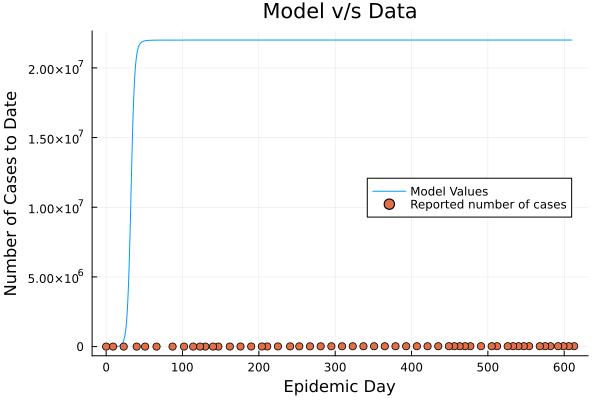

In [20]:
# Parameters
dt = 0.4            # Time step in Days
λ = 2.2*10^-8       # Infection Rate
γ = 0.05            # Recovery Rate
tfinal = 610.       # Simulation End

# Initial Parameters
s0 = 2.2*10^7.         
i0 = 40.
r0 = 1.

# Init. Values
nsteps = round(Int64, tfinal / dt)
resultvec = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)

resultvec[1, :] = [s0, i0, r0]
timevec[1] = 0.

for step in 1:nsteps
    resultvec[step + 1, :] = updateSIR(resultvec[step, :])
    timevec[step+1] = timevec[step] + dt
end

# Calculating Total Values
infectedvals = resultvec[:, 2]
removedvals = resultvec[:, 3]
tcases = infectedvals + removedvals